# Load the data..
*Important Note. We saved the df_clean from the Linear Regression in a csv file to avoid doing the Pre-Processing  again. This file we uploaded for the Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\dimma\OneDrive\Υπολογιστής\Ο.Π.Α\Supervised Learning\Εργασια Linear Regression\cleaned_real_estate_data.csv')
df.sample(10)

,Tιμή Ζώνης,Eπιφάνεια Κύριων Χώρων (σε τ.μ.),Επιφάνεια Βοηθητικών Χώρων (σε τ.μ.),Όροφος,Τίμημα_log,Ηλικία,Cat_Αποθήκες / Γεωργικά-Κτηνοτροφικά κτίρια,Cat_Επαγγελματική Στέγη,Cat_Θέσεις Στάθμευσης,Cat_Κατοικία ή διαμέρισμα πλήν μονοκατοικίας,Cat_Λοιπά Κτίρια,Cat_Μονοκατοικία,Cat_Οικόπεδα
132854,1250.0,69.76,0.00,1.0,10.532123,43.0,False,False,False,True,False,False,False
108855,1000.0,71.10,26.00,1.0,11.289794,15.0,False,False,False,True,False,False,False
83364,600.0,54.00,5.00,0.0,9.952325,30.0,False,False,False,False,False,True,False
42292,600.0,95.45,9.35,1.0,9.952325,42.0,False,False,False,True,False,False,False
281864,750.0,64.23,0.00,1.0,10.445259,46.0,False,False,False,False,False,False,True
125435,1250.0,46.00,0.00,2.0,9.903538,35.0,False,False,False,True,False,False,False
233635,1400.0,140.75,0.00,3.0,10.950824,27.0,False,False,False,True,False,False,False
199360,750.0,139.17,7.59,1.0,9.834548,18.0,False,False,False,False,False,True,False
233016,1600.0,92.50,5.00,1.0,9.903538,46.0,False,False,False,True,False,False,False
70428,750.0,69.81,0.00,2.0,11.002117,27.0,False,False,False,True,False,False,False


In [3]:
df.describe()

,Tιμή Ζώνης,Eπιφάνεια Κύριων Χώρων (σε τ.μ.),Επιφάνεια Βοηθητικών Χώρων (σε τ.μ.),Όροφος,Τίμημα_log,Ηλικία
count,294012.000000,294012.000000,294012.000000,294012.000000,294012.000000,294012.000000
mean,1207.744276,70.460018,4.987216,1.161391,10.131418,43.744555
std,554.044966,46.271697,21.670837,1.611663,1.459952,19.636334
min,200.000000,0.100000,0.000000,-1.000000,6.291791,1.000000
25%,900.000000,47.000000,0.000000,0.000000,9.210440,29.000000
50%,1100.000000,64.230000,0.000000,1.000000,10.308986,46.000000
75%,1400.000000,83.400000,0.000000,2.000000,11.170449,54.000000
max,5000.000000,500.000000,2352.400000,23.000000,14.070154,175.000000


In [4]:
#We un-log the Τιμημα_log to bring it in the original prices
df['Τιμή'] = np.expm1(df['Τίμημα_log'])

In [5]:
#Finding the Median
median_price = df['Τιμή'].median()
print(median_price)

29999.99999999999


In [6]:
#We create the new feature "Ακριβό Ακίνητο"
df['Ακριβό Ακίνητο'] = (df['Τιμή'] > median_price).astype(int)

In [7]:
df['Ακριβό Ακίνητο'].value_counts()

Ακριβό Ακίνητο
0    150455
1    143557
Name: count, dtype: int64

In [8]:
df.isnull().sum()#Checking for null values

Tιμή Ζώνης                                      0
Eπιφάνεια Κύριων Χώρων (σε τ.μ.)                0
Επιφάνεια Βοηθητικών Χώρων (σε τ.μ.)            0
Όροφος                                          0
Τίμημα_log                                      0
Ηλικία                                          0
Cat_Αποθήκες / Γεωργικά-Κτηνοτροφικά κτίρια     0
Cat_Επαγγελματική Στέγη                         0
Cat_Θέσεις Στάθμευσης                           0
Cat_Κατοικία ή διαμέρισμα πλήν μονοκατοικίας    0
Cat_Λοιπά Κτίρια                                0
Cat_Μονοκατοικία                                0
Cat_Οικόπεδα                                    0
Τιμή                                            0
Ακριβό Ακίνητο                                  0
dtype: int64

In [9]:
#We create the X features and the Target. We drop columns to avoid multi-collinearity.
X = df.drop(columns=['Ακριβό Ακίνητο', 'Τίμημα_log','Τιμή'])
y = df['Ακριβό Ακίνητο']

# Training the model for the Logistic regression

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, roc_curve, auc,accuracy_score, precision_score, recall_score,f1_score
from sklearn.preprocessing import StandardScaler


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000, penalty='l1', C=0.5, solver='liblinear')
model.fit(X_train_scaled, y_train)



,penalty,'l1'
,dual,False
,tol,0.0001
,C,0.5
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [29]:
# Predict for the Test set
y_pred_test = model.predict(X_test_scaled)

# Predict for the  Train set
y_pred_train = model.predict(X_train_scaled)


train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print(f"Accuracy (Train): {train_acc:.4f}")
print(f"Accuracy (Test):  {test_acc:.4f}")
print("-" * 30)
print("Confusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_pred_test))

Accuracy (Train): 0.7619
Accuracy (Test):  0.7616
------------------------------
Confusion Matrix (Test Set):
[[23466  6599]
 [ 7419 21319]]


In [17]:
#Printing the metrics for the Logistic Regression


print("Precision:", precision_score(y_test, y_pred_test))
print("Recall:", recall_score(y_test, y_pred_test))
print("F1-score:", f1_score(y_test, y_pred_test))



Precision: 0.7629743553059838
Recall: 0.7422924351033475
F1-score: 0.7524913134733761


In [32]:
#Cross Validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train_scaled, y_train, cv=5)

print(f"Accuracy per fold: {scores}")
print(f"Average Accuracy: {scores.mean():.4f}")
print(f"STD: {scores.std():.4f}")

Accuracy per fold: [0.76104332 0.76023553 0.76172357 0.76540113 0.76163347]
Average Accuracy: 0.7620
STD: 0.0018


In [18]:
y_prob = model.predict_proba(X_test_scaled)[:, 1]

In [19]:
#Calculating the area under the curve
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC:", roc_auc)

ROC AUC: 0.8407217632494756


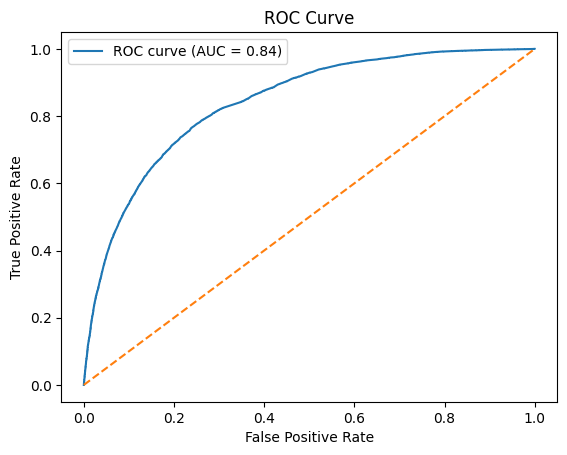

In [21]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

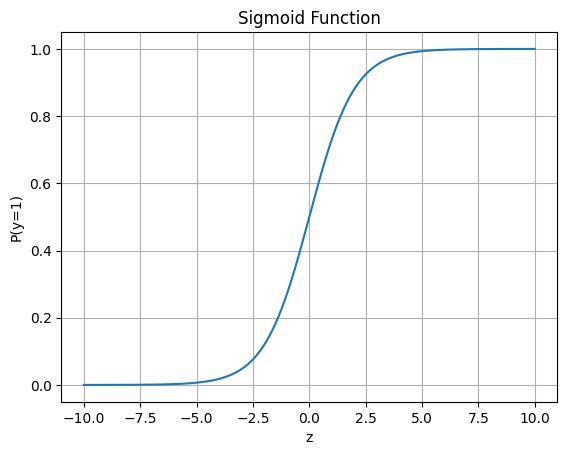

In [22]:
z = np.linspace(-10, 10, 300)
sigmoid = 1 / (1 + np.exp(-z))

plt.figure()
plt.plot(z, sigmoid)
plt.xlabel('z')
plt.ylabel('P(y=1)')
plt.title('Sigmoid Function')
plt.grid(True)
plt.show()


In [23]:
#Printing and finding the best threshold
thresholds = np.arange(0.1, 0.9, 0.05) #We set a range o thresholds by step 0,05

results = []

for t in thresholds:
    y_pred_t = (y_prob >= t).astype(int)
    results.append({
        'Threshold': round(t, 2),
        'Accuracy': accuracy_score(y_test, y_pred_t),
        'Precision': precision_score(y_test, y_pred_t),
        'Recall': recall_score(y_test, y_pred_t),
        'F1-score': f1_score(y_test, y_pred_t)
    })

results_df = pd.DataFrame(results)
results_df

,Threshold,Accuracy,Precision,Recall,F1-score
0,0.10,0.600956,0.551086,0.989665,0.707954
1,0.15,0.614560,0.560059,0.985316,0.714176
2,0.20,0.629560,0.570548,0.978635,0.720842
3,0.25,0.663657,0.596328,0.965064,0.737155
4,0.30,0.698553,0.627590,0.942411,0.753436
5,0.35,0.723143,0.657888,0.903160,0.761255
6,0.40,0.739996,0.686176,0.862412,0.764266
7,0.45,0.760250,0.733478,0.800195,0.765385
8,0.50,0.761356,0.762974,0.742292,0.752491
9,0.55,0.753924,0.790756,0.675134,0.728385


In [24]:
#Trying different thresholds
threshold = 0.45
y_pred = (y_prob >= threshold).astype(int)

print("Threshold:", threshold)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Threshold: 0.45

Confusion Matrix:
[[21709  8356]
 [ 5742 22996]]
              precision    recall  f1-score   support

           0       0.79      0.72      0.75     30065
           1       0.73      0.80      0.77     28738

    accuracy                           0.76     58803
   macro avg       0.76      0.76      0.76     58803
weighted avg       0.76      0.76      0.76     58803



In [25]:
# We create a  DataFrame for the Co-Efficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

# Sorting the Co-Efficients
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)


print(coef_df)

                                         Feature  Coefficient
1               Eπιφάνεια Κύριων Χώρων (σε τ.μ.)     0.995626
0                                     Tιμή Ζώνης     0.896999
3                                         Όροφος     0.251237
2           Επιφάνεια Βοηθητικών Χώρων (σε τ.μ.)     0.138993
8   Cat_Κατοικία ή διαμέρισμα πλήν μονοκατοικίας     0.120548
10                              Cat_Μονοκατοικία     0.057000
9                               Cat_Λοιπά Κτίρια    -0.029357
11                                  Cat_Οικόπεδα    -0.033659
6                        Cat_Επαγγελματική Στέγη    -0.136428
4                                         Ηλικία    -0.435902
5    Cat_Αποθήκες / Γεωργικά-Κτηνοτροφικά κτίρια    -0.847175
7                          Cat_Θέσεις Στάθμευσης    -0.918290


# Συμπεράσματα
- Το μοντέλο διαχωρίζει σχετικά ικανοποιητικά τα ακριβά απο τα μη ακριβά ακίνητο Accuracy=0.76 ενώ τόσο είναι και το Avg Accuracy για Cross Validation με 5 folder. Η μικρή Τυπική απόκλιση STD=0.0018 δείχνει σταθερό μοντέλο.
- Με Threshold 0.45 πετύχαμε Recall 0.80 στα ακριβά ακίνητα που σημαίνει οτι ταξινομεί καλά τα ακριβά ακίνητα, αποφεύγοντας να τα βάλει ως False Negative.
- Σύμφωνα με τους συντελεστές την μεγαλύτερη αυξητική επιρροή στην τιμή την έχουν οι Επιφάνεια Κύριων Χώρων= 0.995626, η Τιμή Ζώνης=0.896999.
- Στην Εφαρμογή της παλινδρόμησης έγινε L1 Regularization και χρησιμοποιήθηκε Standard Scaler.